###  in this project we want to take a look at what some algorithms in the field of search do , some of them are uninformed and also some of them are informed and each of them has some advantages over others; and from the begining we can say that informed search algorithms are actually better and faster algorithms cause they use some informations that the others don't use. and also it is good to take a better look at what is the problem:
### there are two agents and also there are some foods for them and some walls to , agents can't move together at a time and they can not be in the same room in one time, so at a time just one them can make a move.

modeling the problem to a search problem:

there are some states that makes the state space of our problem 
each state contains information about the positions of our agents, where are the foods and also what is the parent of this node

the initial state here is where we start our search algorithm and expand our nodes 

the goal state is the state that all the agents have eaten all the foods and there are no more food to be eaten by the agents so we implemented this by checking if there is any food in our map or not

actions in this problem are going to left, right, up ro down and also eating the food that is in the room you are if you are supposed to 


first, we have to declare the actions that agents can make and also save positions of the foods and also positions of the agents in the map.

In [1]:
import queue
import copy
import collections
import time
import math
directions = [[1, 0], [-1, 0], [0, 1], [0, -1]]
y_len = 0
x_len = 0
wm = list()
pf = list()
qf = list()
bf = list()

in this function we traverse each line of the map and gather information about the map (agents, foods and also walls)

In [18]:
def read_map_line(s, y):
    global px
    global py
    global qx
    global qy
    l = list()
    for x, c in enumerate(s):
        if c != '\n':
            l.append(c)
            if c == 'P':
                px = x
                py = y
            elif c == 'Q':
                qx = x
                qy = y
            elif c == '1':
                pf.append([y, x])
            elif c == '2':
                qf.append([y, x])
            elif c == '3':
                bf.append([y, x])
    return l

in this part we get map from file and traverse it 

In [3]:
wf= open('test1')
for index, line in enumerate(wf):
    wm.append(read_map_line(line, index))

we can model our agents in simple form since they have only X and Y in the map

In [4]:
class Agent:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def to_string(self):
        return str(self.x) + str(self.y)
    def __str__(self):
        return str(self.y) + ' ' + str(self.x)

through solving the problem we are visiting some nodes in our state space and each of these states is modeled here: 
in each state we store the position of the agents and also foods that are remained in the map 
and for checking the algorithm and see what each of the agents has done to reach the goal state we can store the previous state(parent state) and traverse it recursively to print the path that agents covered throught solving the problem

In [5]:
class State:
    def __init__(self, p, q, pf, qf, bf, parent = None):
        self.p = p
        self.q = q
        self.pf = pf
        self.qf = qf
        self.bf = bf
        self.parent = parent
        if parent == None:
            self.depth = 0
        else: 
            self.depth = parent.depth + 1
    def set_path_cost(self, path_cost):
        self.path_cost = path_cost
    def to_string(self):
        result = ''
        result = self.p.to_string() + self.q.to_string()
        for food_list in [self.pf, self.qf, self.bf]:
            for food in food_list:
                result += str(food[0]) + str(food[1])
        return result

we use heapq to implement the priority queue we require to solve the problem using A* algorithm 
in this data structure each node has a priority and with each appending in that the whole nodes modify their positions so with each pop you can get the node with most priority with O(1)

In [6]:
import heapq
 
class PriorityQueue:
    def __init__(self):
        self._queue = []
        self._index = 0
        self.size = 0
 
    def push(self, item, priority):
        heapq.heappush(self._queue, (priority, self._index, item))
        self._index += 1
        self.size += 1
 
    def pop(self):
        self.size -= 1
        return heapq.heappop(self._queue)[-1]

we used some function in all the algorithms that are more related to our state space and states themselves 
like finding that if a position in the map contains wall, food, other agent or it is empty to go through it
also there is a method for considering when we are in the goal state 
and there is a function to calculate a value for the last algorithm to consider where to go first

In [7]:
def is_goal_state(curr_state):
    if not len(curr_state.pf) and not len(curr_state.bf) and not len(curr_state.qf):
        print("goal")
        return True
    return False
def not_wall(x, y, extra_walls, other_agent):
    if [y, x] in extra_walls or wm[y][x] == '%' or [y, x] == [other_agent.y, other_agent.x]:
        return False
    return True
def check_for_food(x, y):
    return wm[y][x]
def calc_heu(curr_state):
    cost = curr_state.path_cost
    min_distance = get_min_distance_to_food(curr_state)
    return cost + min_distance
def get_min_distance_to_food(curr_state):
    min_distance = math.inf
    for foods in [curr_state.pf, curr_state.bf]:
        for food in foods:
            if min_distance > (abs(food[0] - curr_state.p.y)) + (abs(food[1] - curr_state.p.x)):
                min_distance = (abs(food[0] - curr_state.p.y)) + (abs(food[1] - curr_state.p.x))
    for foods in [curr_state.qf, curr_state.bf]:
        for food in foods:
            if min_distance > (abs(food[0] - curr_state.q.y)) + (abs(food[1] - curr_state.q.x)):
                min_distance = (abs(food[0] - curr_state.q.y)) + (abs(food[1] - curr_state.q.x))
    return min_distance

## BFS

Breadth-first search (BFS) is an algorithm for traversing or searching tree or graph data structures. It starts at the tree root (or some arbitrary node of a graph, sometimes referred to as a 'search key'), and explores all of the neighbor nodes at the present depth prior to moving on to the nodes at the next depth level.

the time complexity of this algorithm is O(b^d) [b: branchin factor and d: depth of the answer]
also the memory it uses is O(b^d)

the advantage of using this algorithm is that its complete 

In [8]:
def bfs_finder(staring_state):
    all_states = 0
    visited_states = set()
    mq = collections.deque()
    mq.append(starting_state)
    visited_states.add(starting_state.to_string())
    all_states += 1
    if is_goal_state(starting_state):
        print("states visited: ", len(visited_states))
        print("all states visited : ", all_states)
        return starting_state
    while len(mq):
        curr_state = mq.popleft()
        for d in directions:
            new_px = curr_state.p.x + d[0] 
            new_py = curr_state.p.y + d[1]
            if not_wall(new_px, new_py, curr_state.qf, curr_state.q):
                new_p = Agent(new_px, new_py)
                new_q = Agent(curr_state.q.x, curr_state.q.y)
                new_pf = copy.deepcopy(curr_state.pf)
                new_qf = copy.deepcopy(curr_state.qf)
                new_bf = copy.deepcopy(curr_state.bf)
                food = check_for_food(new_px, new_py)
                if food == '1':
                    new_pf = [x for x in new_pf if x not in [[new_py, new_px]]]
                elif food == '3':
                    new_bf = [x for x in new_bf if x not in [[new_py, new_px]]]
                new_state = State(new_p, new_q, new_pf, new_qf, new_bf, curr_state)
                all_states += 1
                if new_state.to_string() not in visited_states:
                    if is_goal_state(new_state):
                        print("all states visited : ", all_states)
                        print("states visited: ", len(visited_states))
                        return new_state
                    else:
                        mq.append(new_state)
                        visited_states.add(new_state.to_string())
            new_qx = curr_state.q.x + d[0] 
            new_qy = curr_state.q.y + d[1]
            if not_wall(new_qx, new_qy, curr_state.pf, curr_state.p):
                new_q = Agent(new_qx, new_qy)
                new_p = Agent(curr_state.p.x, curr_state.p.y)
                new_pf = copy.deepcopy(curr_state.pf)
                new_qf = copy.deepcopy(curr_state.qf)
                new_bf = copy.deepcopy(curr_state.bf)
                food = check_for_food(new_qx, new_qy)
                if food == '2':
                    new_qf = [x for x in new_qf if x not in [[new_qy, new_qx]]]
                elif food == '3':
                    new_bf = [x for x in new_bf if x not in [[new_qy, new_qx]]]
                new_state = State(new_p, new_q, new_pf, new_qf, new_bf, curr_state)
                all_states += 1
                if new_state.to_string() not in visited_states:
                    if is_goal_state(new_state):
                        print("states visited: ", len(visited_states))
                        print("all states visited : ", all_states)
                        return new_state
                    else:
                        mq.append(new_state)
                        visited_states.add(new_state.to_string())

# printing the path that agent has covered recursively

In [9]:
def print_path(temp):
    if temp.parent == None:
        return 
    print_path(temp.parent)
    print(temp.p)
def print_ans_depth(temp, depth = 0):
    if temp.parent == None:
        print("answer found in depth: ", depth)
        return
    print_ans_depth(temp.parent, depth + 1)

In [10]:
p = Agent(px, py)
q = Agent(qx, qy)
starting_state = State(p, q, pf, qf, bf)

In [11]:
result_time = 0
# for i in range(3):
start = time.time()
final_state = bfs_finder(starting_state)
end = time.time()
result_time += end - start
#     
# print_ans_depth(final_state)
# print(" -- averaged -- finished in :", result_time/3)

goal
states visited:  149595
all states visited :  683979


| test | unique  states | all states| ans depth |          time            |
|------|----------------|-----------|-----------|--------------------------|
|   5  |       346      |    1057   |     13    |   0.026863574981689453   |
|   1  |     149595     |  683979   |     33    |     12.62480624516805    |
|   2  |      3621      |    15343  |     17    |     0.23904895782470703  |
|   3  |      2538      |    9782   |     20    |   0.14844401677449545    |
|   4  |     10497      |    46533  |     17    |   0.7891270319620768     |

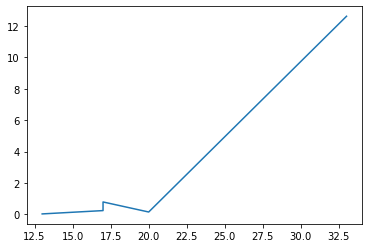

In [22]:
from matplotlib import pyplot as plt 
x = [13, 17, 17, 20, 33]
y = [0.026863574981689453, 0.23904895782470703, 0.7891270319620768, 0.14844401677449545, 12.62480624516805]
plt.plot(x,y) 
plt.show()

##  IDS

IDDFS combines depth-first search’s space-efficiency and breadth-first search’s fast search (for nodes closer to root).

IDDFS calls DFS for different depths starting from an initial value. In every call, DFS is restricted from going beyond given depth. So basically we do DFS in a BFS fashion.

the time complexity of this algorithm is O(b^d) cause it acts like BFS and traverse by the depth that we give to it .
but the advantage of this algorithm is its memory that is use O(bd) since we store nodes that goes in the maximum depth in the state space

In [12]:
def ids(curr_state, depth, visited):
    global all_states
    visited.add((curr_state.to_string(), curr_state.depth))
    if is_goal_state(curr_state):
        print("states visited : ", len(visited))
        print("all states visited : ", all_states)
        return curr_state
    if depth == 0:
        return None
    for d in directions:
        new_px = curr_state.p.x + d[0]
        new_py = curr_state.p.y + d[1]
        if not_wall(new_px, new_py, curr_state.qf, curr_state.q):
            new_p = Agent(new_px, new_py)
            new_q = Agent(curr_state.q.x, curr_state.q.y)
            new_pf = copy.deepcopy(curr_state.pf)
            new_qf = copy.deepcopy(curr_state.qf)
            new_bf = copy.deepcopy(curr_state.bf)
            food = check_for_food(new_px, new_py)
            if food == '1':
                new_pf = [x for x in new_pf if x not in [[new_py, new_px]]]
            elif food == '3':
                new_bf = [x for x in new_bf if x not in [[new_py, new_px]]]
            new_state = State(new_p, new_q, new_pf, new_qf, new_bf, curr_state)
            all_states += 1
            if (new_state.to_string(), new_state.depth) not in visited:
                result = ids(new_state, depth - 1, visited)
                if result != None:
                    return result
        new_qx = curr_state.q.x + d[0]
        new_qy = curr_state.q.y + d[1]
        if not_wall(new_qx, new_qy, curr_state.pf, curr_state.p):
            new_q = Agent(new_qx, new_qy)
            new_p = Agent(curr_state.p.x, curr_state.p.y)
            new_pf = copy.deepcopy(curr_state.pf)
            new_qf = copy.deepcopy(curr_state.qf)
            new_bf = copy.deepcopy(curr_state.bf)
            food = check_for_food(new_qx, new_qy)
            if food == '2':
                new_qf = [x for x in new_qf if x not in [[new_qy, new_qx]]]
            elif food == '3':
                new_bf = [x for x in new_bf if x not in [[new_qy, new_qx]]]
            new_state = State(new_p, new_q, new_pf, new_qf, new_bf, curr_state)
            all_states += 1
            if (new_state.to_string(), new_state.depth) not in visited:
                result = ids(new_state, depth - 1, visited)
                if result != None:
                    return result

In [13]:
all_states = 0
time_result = 0
# for i in range(3):
depth = 0
start = time.time()
while True:
    visited = set()
#     print(depth)
    final_state = ids(starting_state, depth, visited)
    if final_state != None:
        end = time.time()
        time_result += end - start
        break
    depth += 1
#         
# print_ans_depth(final_state)
# print(" -- averaged -- finished in :", time_result/3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
goal
states visited :  681560
all states visited :  20982854


| test | unique  states | all states| ans depth |          time            |
|------|----------------|-----------|-----------|--------------------------|
|   5  |       722      |   10504   |    13     |   0.21237913767496744    |
|   1  |     681560     |  2098285  |    33     |     373.475124279658     |
|   2  |       8914     |   149352  |    17     |    2.4801674683888755    |
|   3  |      3745      |  158316   |    20     |     2.6865471998850503   |
|   4  |     17407      |   389499  |    17     |    5.716907183329265     |

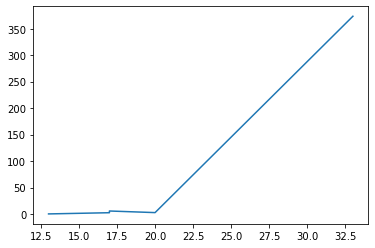

In [23]:
from matplotlib import pyplot as plt 
x = [13, 17, 17, 20, 33]
y = [0.21237913767496744, 2.4801674683888755, 5.716907183329265, 2.6865471998850503, 373.475124279658]
plt.plot(x,y) 
plt.show()

## A*

A* is like Dijkstra’s Algorithm in that it can be used to find a shortest path. A* is like Greedy Best-First-Search in that it can use a heuristic to guide itself

The secret to its success is that it combines the pieces of information that Dijkstra’s Algorithm uses (favoring vertices that are close to the starting point) and information that Greedy Best-First-Search uses (favoring vertices that are close to the goal).

we can not talk about its time complexity and memori it uses cause its related to the heuristic we choose and also how agents act through running the algorithm



##### Heuristic

the heuristic we use here is similar to manhattan distance and this is because in this problem you can go in four direction in each action 
for each node we define the heuristic in this way that we get the minimum distance to nearest food for two of the agents. (minimum of all these distances for all the foods that agents can eat)

In [14]:
def a_star_finder(starting_state):
    all_states = 0
    visited = set()
    pq = PriorityQueue()
    visited.add(starting_state.to_string())
    if is_goal_state(starting_state):
        print("all states visited : ", all_states)
        return starting_state
    pq.push(starting_state, calc_heu(starting_state))
    while pq.size:
        curr_state = pq.pop()
        for d in directions:
            new_px = curr_state.p.x + d[0]
            new_py = curr_state.p.y + d[1]
            if not_wall(new_px, new_py, curr_state.qf, curr_state.q):
                new_p = Agent(new_px, new_py)
                new_q = Agent(curr_state.q.x, curr_state.q.y)
                new_pf = copy.deepcopy(curr_state.pf)
                new_qf = copy.deepcopy(curr_state.qf)
                new_bf = copy.deepcopy(curr_state.bf)
                food = check_for_food(new_px, new_py)
                if food == '1':
                    new_pf = [x for x in new_pf if x not in [[new_py, new_px]]]
                elif food == '3':
                    new_bf = [x for x in new_bf if x not in [[new_py, new_px]]]
                new_state = State(new_p, new_q, new_pf, new_qf, new_bf, curr_state)
                new_state.set_path_cost(curr_state.path_cost + 1)
                all_states += 1
                if new_state.to_string() not in visited:
                    if is_goal_state(new_state):
                        print(len(visited))
                        print("all states visited : ", all_states)
                        return new_state
                    pq.push(new_state, calc_heu(new_state))
                    visited.add(new_state.to_string())
            new_qx = curr_state.q.x + d[0]
            new_qy = curr_state.q.y + d[1]
            if not_wall(new_qx, new_qy, curr_state.pf, curr_state.p):
                new_q = Agent(new_qx, new_qy)
                new_p = Agent(curr_state.p.x, curr_state.p.y)
                new_pf = copy.deepcopy(curr_state.pf)
                new_qf = copy.deepcopy(curr_state.qf)
                new_bf = copy.deepcopy(curr_state.bf)
                food = check_for_food(new_qx, new_qy)
                if food == '2':
                    new_qf = [x for x in new_qf if x not in [[new_qy, new_qx]]]
                elif food == '3':
                    new_bf = [x for x in new_bf if x not in [[new_qy, new_qx]]]
                new_state = State(new_p, new_q, new_pf, new_qf, new_bf, curr_state)
                new_state.set_path_cost(curr_state.path_cost + 1)
                all_states += 1
                if new_state.to_string() not in visited:
                    if is_goal_state(new_state):
                        print(len(visited))
                        print("all states visited : ", all_states)
                        return new_state
                    pq.push(new_state, calc_heu(new_state))
                    visited.add(new_state.to_string())

In [15]:
result_time = 0
# for i in range(3):
start = time.time()
starting_state.set_path_cost(0)
result = a_star_finder(starting_state)
print_ans_depth(result)
end = time.time()
result_time += end - start
# print("finished in : ", result_time / 3)

goal
126505
all states visited :  545292
answer found in depth:  33


| test | visited states | all states| ans depth |          time            |
|------|----------------|-----------|-----------|--------------------------|
|   5  |       278      |    816    |     13    |   0.21237913767496744    |
|   1  |      126505    |   545292  |     33    |   12.444507678349813     |
|   2  |      2917      |    11221  |     17    |   0.20180058479309082    |
|   3  |      1996      |    6829   |     20    |   0.11298147837320964    |
|   4  |      5591      |   21209   |     17    |   0.3690911928812663     |

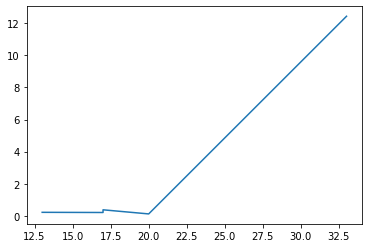

In [24]:
from matplotlib import pyplot as plt 
x = [13, 17, 17, 20, 33]
y = [0.21237913767496744, 0.20180058479309082, 0.3690911928812663, 0.11298147837320964, 12.444507678349813]
plt.plot(x,y) 
plt.show()